In [7]:
# -*- coding: utf-8 -*-
# 따릉이 데이터 셋 
#from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import xgboost as xgb


data = pd.read_csv("C:/Users/GSE/suicide/Bike/Bike_csv/predict_data.csv")

data =data.fillna(0) # 데이터에 nan 값 전부 0처리 
data.head()

,hour,minutes,count,대여/반납,holiday,weather,Rain,Month,Day,Day_w,Time,AM/PM,humidity,wind,Snow
0,0.0,0.0,20.000000,0.0,2.0,-3.2,0.0,1.0,1.0,1.0,0:00,1.0,40.0,0.5,0.0
1,0.0,30.0,20.500000,0.0,2.0,-3.2,0.0,1.0,1.0,1.0,0:30,1.0,40.0,0.5,0.0
2,1.0,0.0,20.000000,1.0,2.0,-3.3,0.0,1.0,1.0,1.0,1:00,1.0,41.0,0.7,0.0
3,2.0,0.0,16.250000,-1.0,2.0,-3.7,0.0,1.0,1.0,1.0,2:00,1.0,42.0,0.9,0.0
4,2.0,30.0,13.833333,-5.0,2.0,-3.7,0.0,1.0,1.0,1.0,2:30,1.0,42.0,0.9,0.0


In [2]:
# 날짜를 인덱스 처리
data['Time']
data = data.set_index(['Time'])
data.index = pd.to_datetime(data.index)

In [3]:
for i in range(0,len(data)):
    data['count'][i] = round(data['count'][i],0)
data['count'] = data['count'].astype(int)
data.head()    

,hour,minutes,count,대여/반납,holiday,weather,Rain,Month,Day,Day_w,AM/PM,humidity,wind,Snow
Time,,,,,,,,,,,,,,
2019-11-26 00:00:00,0.0,0.0,20,0.0,2.0,-3.2,0.0,1.0,1.0,1.0,1.0,40.0,0.5,0.0
2019-11-26 00:30:00,0.0,30.0,20,0.0,2.0,-3.2,0.0,1.0,1.0,1.0,1.0,40.0,0.5,0.0
2019-11-26 01:00:00,1.0,0.0,20,1.0,2.0,-3.3,0.0,1.0,1.0,1.0,1.0,41.0,0.7,0.0
2019-11-26 02:00:00,2.0,0.0,16,-1.0,2.0,-3.7,0.0,1.0,1.0,1.0,1.0,42.0,0.9,0.0
2019-11-26 02:30:00,2.0,30.0,14,-5.0,2.0,-3.7,0.0,1.0,1.0,1.0,1.0,42.0,0.9,0.0


In [4]:
# x값과 y값 구분
import pandas as pd
import numpy as np

# x: data / y : 결과값

x = data.drop(["count"], axis=1)
y = data["count"].astype(int)
#print(x)
x.to_csv("filename.csv",header = True, index = False)
y.mean()
y.median()

18.0

In [5]:
#train,validation,test set 으로 나눔  

import numpy as np
train_size = int(len(y)* 0.6)
val_size = int(len(y)*0.8)
test_size = len(y)- val_size

train_x, test_x = np.array(x[0:train_size]),np.array(x[val_size:])
val_x, val_y = np.array(x[train_size:val_size]),np.array(y[train_size:val_size])
train_y, test_y = np.array(y[0:train_size]),np.array(y[val_size:])
print(train_size,",",val_size,",",test_size)


2736 , 3648 , 912


In [61]:
import xgboost as xgb
xgb_clf = xgb.XGBRegressor(n_estimators = 60,
                           max_depth =5,
                           learning_rate = 0.07,
                           subsample = 0.8,
                          colsample_bytree = 0.6,
                          colsample_bylevel = 0.3,
                           min_child_weight =4,
                           nthread =4,
                           objective = 'reg:squarederror',
                           silent = 1,
                          seed =37)

#xgb_clf.fit(train_x,train_y)

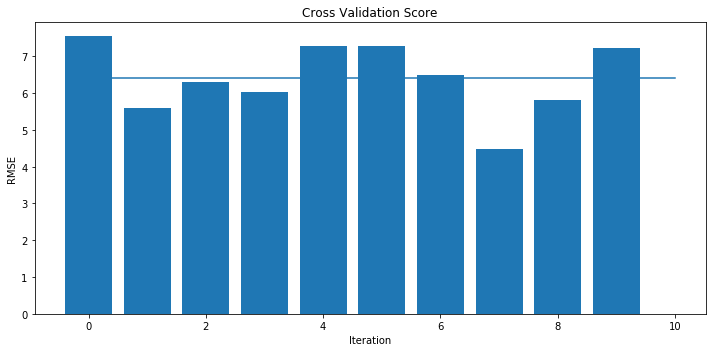

In [7]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score
#np.mean(cross_val_score(r_reg, train_x, train_y, cv=5, scoring=rmsle_scorer))
scorer = make_scorer(mean_squared_error, False)
cv_score = np.sqrt(-cross_val_score(xgb_clf, train_x, train_y,cv=10,scoring = scorer))

import matplotlib as plt
import matplotlib.pyplot as plt

plt.figure(figsize =(10,5))
plt.bar(range(len(cv_score)),cv_score)
plt.title('Cross Validation Score')
plt.ylabel('RMSE')
plt.xlabel('Iteration')

plt.plot(range(len(cv_score)+1),[cv_score.mean()] * (len(cv_score) + 1))
plt.tight_layout()

In [29]:
# XGBRegressor에 대한 GridSearchCV

from sklearn.model_selection import GridSearchCV

xgb_clf = xgb.XGBRegressor() 
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [0.07,0.05,0.01], #so called `eta` value
              'max_depth': [5,10,15,20],
              'min_child_weight': [4,8,12],
              'silent': [1],
              'colsample_bylevel' : [01.,0.3,0.5,0.7,0.9],
              'subsample': [0.5,0.7,0.9],
              'colsample_bytree': [0.6,0.7,0.8],
              'n_estimators': [30,50,70,100,150]}
mae = metrics.mean_absolute_error(test_y,test_pred_y)
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=3, n_jobs=-1,
                          scoring ='neg_mean_absolute_error') # MAE 사용 
print("parameters:")
print(parameters)
grid_search.fit(train_x, train_y)
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters=grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
end_time = datetime.datetime.now()
#print 'Select Done..., Time Cost: %d' % ((end_time - start_time).seconds) 


parameters:
{'nthread': [4], 'objective': ['reg:squarederror'], 'learning_rate': [0.07, 0.05, 0.01], 'max_depth': [5, 10, 15, 20], 'min_child_weight': [4, 8, 12], 'silent': [1], 'colsample_bylevel': [1.0, 0.3, 0.5, 0.7, 0.9], 'subsample': [0.5, 0.7, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8], 'n_estimators': [30, 50, 70, 100, 150]}
Best score: -5.142
Best parameters set:
	colsample_bylevel: 0.9
	colsample_bytree: 0.7
	learning_rate: 0.07
	max_depth: 5
	min_child_weight: 8
	n_estimators: 50
	nthread: 4
	objective: 'reg:squarederror'
	silent: 1
	subsample: 0.5


NameError: name 'datetime' is not defined

In [ ]:
#1차{'colsample_bytree': 0.6, 'learning_rate': 0.07, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 50, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
#2차 {'colsample_bytree': 0.6, 'learning_rate': 0.07, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 50, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
#3차{'colsample_bylevel': 0.3, 'colsample_bytree': 0.6, 'learning_rate': 0.07, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 60, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.8}
#4차{ colsample_bylevel: 0.7 colsample_bytree: 0.7 learning_rate: 0.07 max_depth: 5 min_child_weight: 6 n_estimators: 70 nthread: 4 objective: 'reg:linear' silent: 1 subsample: 0.5}
#변수 수정 후 
#1차colsample_bylevel: 0.5, colsample_bytree: 0.8,learning_rate: 0.07,max_depth: 9,min_child_weight: 4,n_estimators: 70,nthread: 4,objective: 'reg:linear',silent: 1, subsample: 0.7

In [30]:
grid_search.best_params_

{'colsample_bylevel': 0.9,
 'colsample_bytree': 0.7,
 'learning_rate': 0.07,
 'max_depth': 5,
 'min_child_weight': 8,
 'n_estimators': 50,
 'nthread': 4,
 'objective': 'reg:squarederror',
 'silent': 1,
 'subsample': 0.5}

[0]	validation_0-mae:16.8206	validation_0-rmse:18.2104	validation_1-mae:14.652	validation_1-rmse:16.6223
[1]	validation_0-mae:15.6686	validation_0-rmse:17.0782	validation_1-mae:13.6442	validation_1-rmse:15.657
[2]	validation_0-mae:14.5966	validation_0-rmse:16.0322	validation_1-mae:12.6948	validation_1-rmse:14.743
[3]	validation_0-mae:13.6101	validation_0-rmse:15.0683	validation_1-mae:11.8502	validation_1-rmse:13.8993
[4]	validation_0-mae:12.7075	validation_0-rmse:14.1912	validation_1-mae:11.0552	validation_1-rmse:13.1306
[5]	validation_0-mae:11.8844	validation_0-rmse:13.3901	validation_1-mae:10.3918	validation_1-rmse:12.4897
[6]	validation_0-mae:11.1158	validation_0-rmse:12.6338	validation_1-mae:9.77094	validation_1-rmse:11.8417
[7]	validation_0-mae:10.4037	validation_0-rmse:11.9214	validation_1-mae:9.23003	validation_1-rmse:11.2545
[8]	validation_0-mae:9.77352	validation_0-rmse:11.294	validation_1-mae:8.76408	validation_1-rmse:10.768
[9]	validation_0-mae:9.16928	validation_0-rmse:10.6

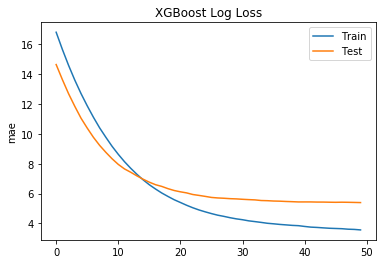

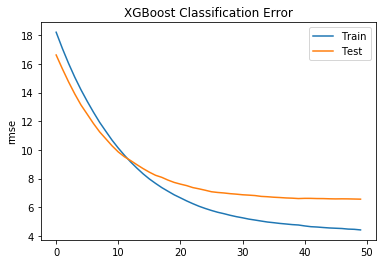

In [8]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

# #############################################################################
# Fit regression model
""""""
eval_s = [(train_x,train_y),(val_x,val_y)]
params = {'colsample_bylevel': 0.9,
 'colsample_bytree': 0.7,
 'learning_rate': 0.07,
 'max_depth': 5,
 'min_child_weight': 8,
 'n_estimators': 50,
 'nthread': 4,
 'objective': 'reg:squarederror',
 'silent': 1,
 'subsample': 0.5,
'silent':1,
'seed':37}
#clf = ensemble.GradientBoostingRegressor(**params)
xgb_clf = xgb.XGBRegressor(**params)
xgb_clf.fit(train_x,train_y,eval_metric=['mae','rmse'],eval_set=eval_s,verbose=True)

mse = mean_squared_error(val_y, xgb_clf.predict(val_x))
print("MSE: %.4f" % mse)
#print(xgb_clf.evals_result)
# make predictions for test data
y_pred = xgb_clf.predict(test_x)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(test_y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = xgb_clf.evals_result()
epochs = len(results['validation_0']['mae'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mae'], label='Train')
ax.plot(x_axis, results['validation_1']['mae'], label='Test')
ax.legend()
pyplot.ylabel('mae')
pyplot.title('XGBoost Log Loss')
pyplot.show()

# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
pyplot.ylabel('rmse')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [63]:
# train data fit
xgb_clf.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=5, min_child_weight=8, missing=None, n_estimators=50,
             n_jobs=1, nthread=4, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=37, silent=1,
             subsample=0.5, verbosity=1)

In [9]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values, convert_Exp = True):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)

    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)

    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)

    # 평균을 낸다.
    mean_difference = difference.mean()

    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)

    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [10]:
import sklearn.metrics as metrics
import math
# Show model results of training set
train_pred_y = xgb_clf.predict(train_x)
mae = metrics.mean_absolute_error(train_y,train_pred_y)
mse = metrics.mean_squared_error(train_y,train_pred_y)
print ("TRAINING SET")
print ("============")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", xgb_clf.score(train_x,train_y))
print ("feature_importances:",xgb_clf.feature_importances_)
#print ("n_features:         ",xgb_clf.n_features_)
#print ("n_outputs:          ",xgb_clf.n_outputs_)
print ("last column (% Iron Concentrate) is the highest feature_importances")

TRAINING SET
MAE:                 3.5598579883924004
RMSE:                4.412594227371604
r2:                  0.6216225831651216
feature_importances: [0.20818588 0.01517159 0.09085862 0.07858931 0.06516206 0.
 0.06691992 0.0693265  0.08356439 0.1136371  0.08593471 0.04138232
 0.08126762]
last column (% Iron Concentrate) is the highest feature_importances


In [11]:
import sklearn.metrics as metrics
import math
# Show model results of training set
val_pred_y = xgb_clf.predict(val_x)
mae = metrics.mean_absolute_error(val_y,val_pred_y)
mse = metrics.mean_squared_error(val_y,val_pred_y)
print ("VAL SET")
print ("============")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", xgb_clf.score(train_x,train_y))
print ("feature_importances:",xgb_clf.feature_importances_)
#print ("n_features:         ",xgb_clf.n_features_)
#print ("n_outputs:          ",xgb_clf.n_outputs_)
print ("last column (% Iron Concentrate) is the highest feature_importances")

VAL SET
MAE:                 5.3938635409924025
RMSE:                6.558873865395954
r2:                  0.6216225831651216
feature_importances: [0.20818588 0.01517159 0.09085862 0.07858931 0.06516206 0.
 0.06691992 0.0693265  0.08356439 0.1136371  0.08593471 0.04138232
 0.08126762]
last column (% Iron Concentrate) is the highest feature_importances


[Text(0.5, 1.0, 'val')]

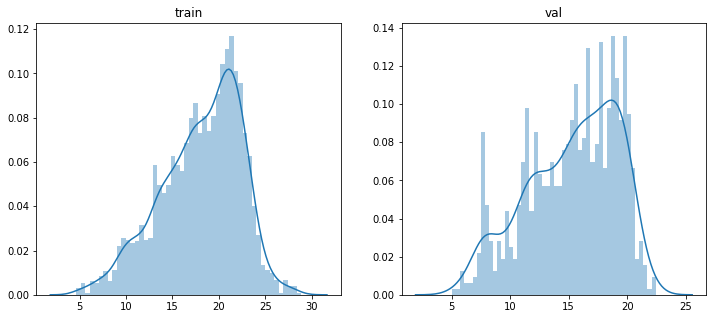

In [12]:
# 예측한 데이터 시각화 
import matplotlib.pyplot as plt
import seaborn as sns
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(train_pred_y,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(val_pred_y ,ax=ax2,bins=50)
ax2.set(title="val")
#sns.distplot(test_pred_y ,ax=ax3,bins=50)
#ax3.set(title="test")

In [13]:
# train, test set으로 나눈다.
import numpy as np
train_size = int(len(y)* 0.8)
#test_size = len(y)- train_size
print(train_size,",",test_size)
#####################################
# train, test 나누기#
##########################33
#split to train and testing

train_x, test_x = np.array(x[0:train_size]),np.array(x[train_size:])
#val_x, val_y = np.array(x[train_size:val_size]),np.array(y[train_size:val_size])
train_y, test_y = np.array(y[0:train_size]),np.array(y[train_size:])
len(test_y)

3648 , 912


912

[0]	validation_0-rmse:17.8159	validation_0-mae:16.2759	validation_1-rmse:19.4021	validation_1-mae:17.3983
[1]	validation_0-rmse:16.7244	validation_0-mae:15.1686	validation_1-rmse:18.2424	validation_1-mae:16.2787
[2]	validation_0-rmse:15.7038	validation_0-mae:14.1343	validation_1-rmse:17.2693	validation_1-mae:15.3048
[3]	validation_0-rmse:14.7511	validation_0-mae:13.1618	validation_1-rmse:16.556	validation_1-mae:14.5324
[4]	validation_0-rmse:13.8919	validation_0-mae:12.2876	validation_1-rmse:15.625	validation_1-mae:13.6347
[5]	validation_0-rmse:13.0792	validation_0-mae:11.463	validation_1-rmse:14.8703	validation_1-mae:12.8873
[6]	validation_0-rmse:12.3592	validation_0-mae:10.735	validation_1-rmse:14.1333	validation_1-mae:12.1289
[7]	validation_0-rmse:11.6741	validation_0-mae:10.0492	validation_1-rmse:13.509	validation_1-mae:11.5279
[8]	validation_0-rmse:11.0591	validation_0-mae:9.44182	validation_1-rmse:12.9623	validation_1-mae:10.993
[9]	validation_0-rmse:10.4931	validation_0-mae:8.899

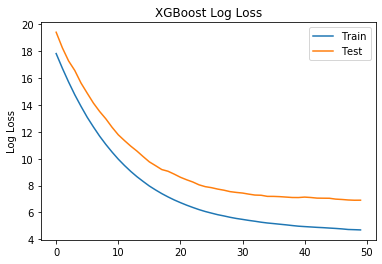

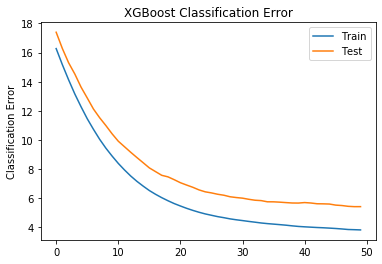

In [14]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

# #############################################################################
# Fit regression model
""""""
eval_s = [(train_x,train_y),(test_x,test_y)]
params = {'colsample_bylevel': 0.9,
 'colsample_bytree': 0.7,
 'learning_rate': 0.07,
 'max_depth': 5,
 'min_child_weight': 8,
 'n_estimators': 50,
 'nthread': 4,
 'objective': 'reg:squarederror',
 'silent': 1,
 'subsample': 0.5,
'silent':1,
'seed':37}
#clf = ensemble.GradientBoostingRegressor(**params)
xgb_clf = xgb.XGBRegressor(**params)
xgb_clf.fit(train_x,train_y,eval_metric=['rmse','mae'],eval_set=eval_s,verbose=True)

mse = mean_squared_error(test_y, xgb_clf.predict(test_x))
print("MSE: %.4f" % mse)
#print(xgb_clf.evals_result)
# make predictions for test data
y_pred = xgb_clf.predict(test_x)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(test_y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = xgb_clf.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mae'], label='Train')
ax.plot(x_axis, results['validation_1']['mae'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [15]:
# train data fit
xgb_clf.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=5, min_child_weight=8, missing=None, n_estimators=50,
             n_jobs=1, nthread=4, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=37, silent=1,
             subsample=0.5, verbosity=1)

In [16]:
import sklearn.metrics as metrics
import math
# Show model results of training set
train_pred_y = xgb_clf.predict(train_x)
mae = metrics.mean_absolute_error(train_y,train_pred_y)
mse = metrics.mean_squared_error(train_y,train_pred_y)
print ("TRAINING SET")
print ("============")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", xgb_clf.score(train_x,train_y))
print ("feature_importances:",xgb_clf.feature_importances_)
#print ("n_features:         ",xgb_clf.n_features_)
#print ("n_outputs:          ",xgb_clf.n_outputs_)
print ("last column (% Iron Concentrate) is the highest feature_importances")

TRAINING SET
MAE:                 3.826922308326813
RMSE:                4.70486811499109
r2:                  0.6021760075380287
feature_importances: [0.29109633 0.00671419 0.09435341 0.06039269 0.06377644 0.04785218
 0.06998262 0.05674314 0.06386509 0.06097663 0.06952498 0.03999017
 0.07473221]
last column (% Iron Concentrate) is the highest feature_importances


In [18]:
import sklearn.metrics as metrics
import math
# Show model results of training set
test_pred_y = xgb_clf.predict(test_x)
mae = metrics.mean_absolute_error(test_y,test_pred_y)
mse = metrics.mean_squared_error(test_y,test_pred_y)
print ("TEST SET")
print ("============")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", xgb_clf.score(train_x,train_y))
print ("feature_importances:",xgb_clf.feature_importances_)
#print ("n_features:         ",xgb_clf.n_features_)
#print ("n_outputs:          ",xgb_clf.n_outputs_)
print ("last column (% Iron Concentrate) is the highest feature_importances")

TEST SET
MAE:                 5.424868130893038
RMSE:                6.914429403870213
r2:                  0.6021760075380287
feature_importances: [0.29109633 0.00671419 0.09435341 0.06039269 0.06377644 0.04785218
 0.06998262 0.05674314 0.06386509 0.06097663 0.06952498 0.03999017
 0.07473221]
last column (% Iron Concentrate) is the highest feature_importances


In [19]:
test_pred_y.mean()

16.494444

In [20]:
for i in range(0,len(test_y)):
    print(test_y[i],'||', test_pred_y[i],'||', test_y[i]-test_pred_y[i])

10 || 6.723738 || 3.276261806488037
6 || 6.868068 || -0.8680682182312012
5 || 6.2916007 || -1.2916007041931152
6 || 6.7703137 || -0.7703137397766113
5 || 6.7703137 || -1.7703137397766113
4 || 7.77895 || -3.7789502143859863
5 || 7.39238 || -2.3923802375793457
4 || 7.3255286 || -3.325528621673584
6 || 6.8159127 || -0.8159127235412598
9 || 21.285444 || -12.285444259643555
10 || 17.608477 || -7.608476638793945
12 || 21.270033 || -9.27003288269043
12 || 19.078604 || -7.078603744506836
14 || 21.448828 || -7.448827743530273
16 || 24.738361 || -8.738361358642578
16 || 21.769001 || -5.769001007080078
20 || 21.769001 || -1.7690010070800781
27 || 20.419985 || 6.580015182495117
32 || 20.845646 || 11.154354095458984
32 || 18.596691 || 13.403308868408203
32 || 19.38969 || 12.610309600830078
33 || 19.38969 || 13.610309600830078
24 || 20.30515 || 3.6948509216308594
21 || 18.927162 || 2.0728378295898438
19 || 18.233881 || 0.7661190032958984
21 || 18.498978 || 2.5010223388671875
22 || 20.59899 || 1.4010

[Text(0.5, 1.0, 'test')]

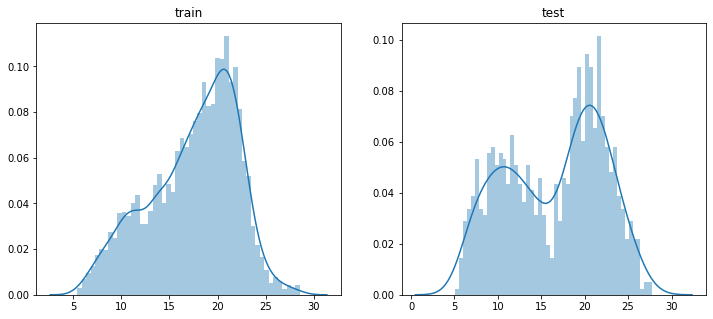

In [27]:
# 예측한 데이터 시각화 
import matplotlib.pyplot as plt
import seaborn as sns
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(train_pred_y,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(test_pred_y ,ax=ax2,bins=50)
ax2.set(title="test")
#sns.distplot(test_pred_y ,ax=ax3,bins=50)
#ax3.set(title="test")

In [12]:
"""
for i in range(len(test_y)):
    print(test_y[i],test_pred_y[i], test_pred_y[i] - test_y[i] )
    """

'\nfor i in range(len(test_y)):\n    print(test_y[i],test_pred_y[i], test_pred_y[i] - test_y[i] )\n    '

In [21]:
from sklearn.externals import joblib
joblib.dump(xgb_clf,'xgb_model.model')

C:\Users\GSE\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['xgb_model.model']

In [16]:
from sklearn.externals import joblib
your_model = joblib.load('xgb_model.model')

C:\Users\GSE\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
from flask import Flask
#int hour, int minutes, int rent, int holiday, int weather, int rain, int Month, int Day, int Day_w,
#int Am, int 습도, int 풍속, int snow, AsyncCallback<Double> callback
sample_api = Flask(__name__)

@sample_api.route('/bike/',methods = ['GET'])
def hello_world():
    hour = int(request.args["s_hour"])
    minutes = int(request.args["s_munutes"])
    rent= int(request.args["s_rent"])
    holiday= int(request.args["s_holiday"])
    weather= int(request.args["s_weather"])
    rain = int(request.args["s_rain"])
    Month= int(request.args["s_Month"])
    Day= int(request.args["s_Day"])
    Day_w= int(request.args["s_Day_w"])
    Am= int(request.args["s_Am"])
    humidity= int(request.args["s_humidity"])
    wind= int(request.args["s_wind"])
    snow= int(request.args["s_snow"])
    list.append(hour)
    list.append(minutes)
    list.append(rent)
    list.append(holiday)
    list.append(waether)
    list.append(rain)
    list.append(Month)
    list.append(Day)
    list.append(Day_w)
    list.append(Am)
    list.append(humidity)
    list.append(wind)
    list.append(snow)
    #list = [1,30,0,2,3.2,0.0,1,1,1,40,0.5,0.0,0]
    list = np.array(list).reshape(1,13)
    predictions = your_model.predict(list)
    y= np.array([1])
    #result = 0
    #num_1 = request.args["num_1"]
    #num_2 = request.args["num_2"]
    #answer = str(test_y[0])
    return str(y[0])

if __name__ == '__main__':
    sample_api.run()
    

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [33]:
from sklearn.externals import joblib

joblib.dump(xgb_clf, 'xgb_model.model')

C:\Users\GSE\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['xgb_model.model']